In [ ]:
!pip install geopandas shapely contextily matplotlib seaborn requests fiona rasterio pyproj reportlab folium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 21.9 MB/s eta 0:00:00


In [ ]:
project_name = "My Project"
site_address = "London, UK"
client_name = "Client"
report_date = "2026-02-12"

In [ ]:
latitude = 51.5074
longitude = -0.1278
coords = (latitude, longitude)

In [ ]:
import geopandas as gpd
from shapely.geometry import Point
import os

# Create a dummy GeoDataFrame with a point at the specified latitude/longitude
# GeoJSON typically expects (longitude, latitude)
data = {'name': ['Site Location'], 'geometry': [Point(longitude, latitude)]}
dummy_gdf = gpd.GeoDataFrame(data, crs="EPSG:4326")

geojSON_filename = "example_site_boundary.geojson"
dummy_gdf.to_file(geojSON_filename, driver="GeoJSON")

# Simulate the output of files.upload() for consistency, although geopandas.read_file can take the filename directly
# For this purpose, the actual bytes content is not critical for geopandas.read_file when reading from disk
with open(geojSON_filename, 'rb') as f:
    dummy_file_content = f.read()

uploaded = {geojSON_filename: dummy_file_content}

print(f"Generated example GeoJSON file: {geojSON_filename}")

Generated example GeoJSON file: example_site_boundary.geojson


In [ ]:
import geopandas as gpd

boundary = gpd.read_file(list(uploaded.keys())[0])
boundary = boundary.to_crs(epsg=3857)

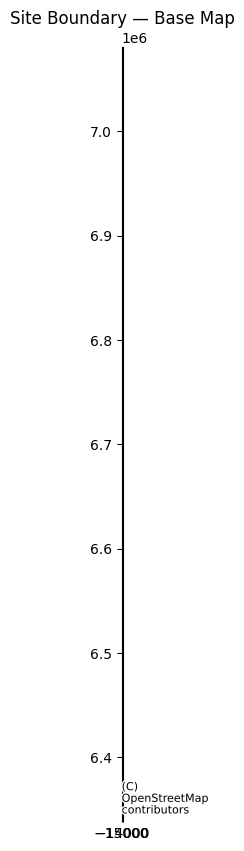

In [ ]:
import contextily as ctx
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))
boundary.plot(ax=ax, facecolor="none", edgecolor="red", linewidth=2)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
plt.title("Site Boundary — Base Map")
plt.show()

In [ ]:
import requests

def get_climate_data(lat, lon):
    url = f"https://api.open-meteo.com/v1/forecast?latitude={lat}&longitude={lon}&hourly=temperature_2m"
    return requests.get(url).json()

climate_data = get_climate_data(latitude, longitude)

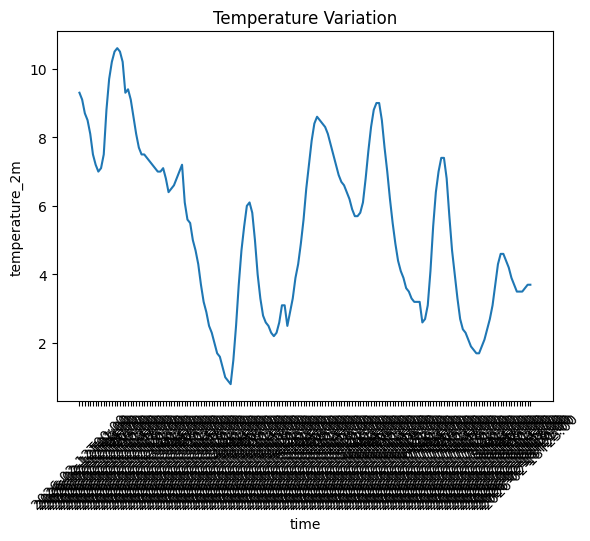

In [ ]:
import pandas as pd
import seaborn as sns

df = pd.DataFrame(climate_data["hourly"])
sns.lineplot(data=df, x="time", y="temperature_2m")
plt.title("Temperature Variation")
plt.xticks(rotation=45)
plt.show()

In [ ]:
!pip install pysolar
from pysolar.solar import get_altitude, get_azimuth
import datetime
import pytz # Import pytz for timezone awareness

def compute_sun_path(lat, lon, date):
    # Make datetime objects timezone-aware (e.g., UTC)
    utc_timezone = pytz.utc
    times = [utc_timezone.localize(datetime.datetime(date.year, date.month, date.day, h)) for h in range(24)]
    altitudes = [get_altitude(lat, lon, t) for t in times]
    azimuths = [get_azimuth(lat, lon, t) for t in times]
    return times, altitudes, azimuths

times, altitudes, azimuths = compute_sun_path(latitude, longitude, datetime.date(2026, 6, 21))

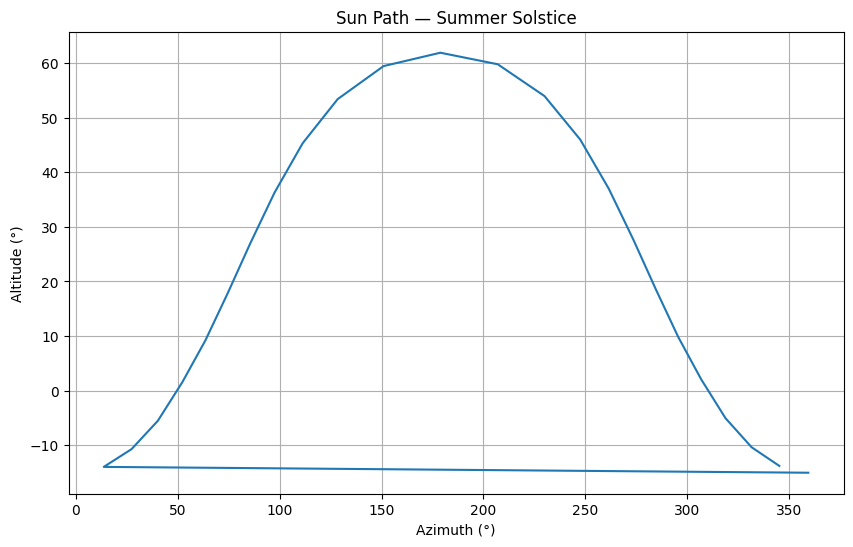

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(azimuths, altitudes)
plt.xlabel("Azimuth (°)")
plt.ylabel("Altitude (°)")
plt.title("Sun Path — Summer Solstice")
plt.grid(True)
plt.show()

In [ ]:
def get_wind_data(lat, lon):
    url = f"https://api.open-meteo.com/v1/forecast?latitude={lat}&longitude={lon}&hourly=windspeed_10m,winddirection_10m"
    return requests.get(url).json()

wind_data = get_wind_data(latitude, longitude)

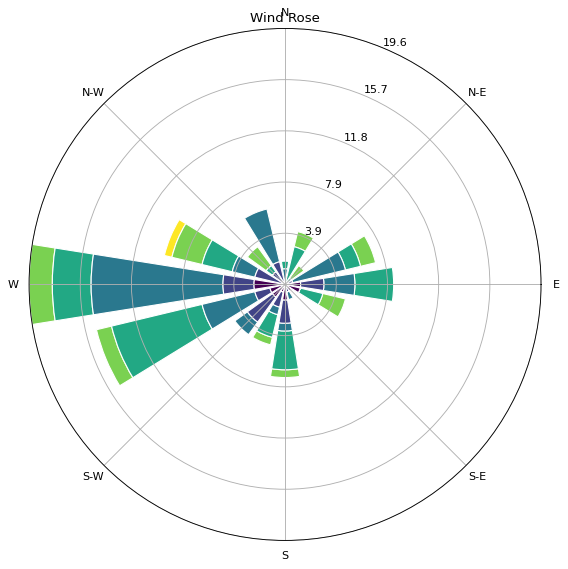

In [ ]:
!pip install windrose
from windrose import WindroseAxes

ws = wind_data["hourly"]["windspeed_10m"]
wd = wind_data["hourly"]["winddirection_10m"]

ax = WindroseAxes.from_ax()
ax.bar(wd, ws, normed=True, opening=0.8, edgecolor='white')
ax.set_title("Wind Rose")
plt.show()

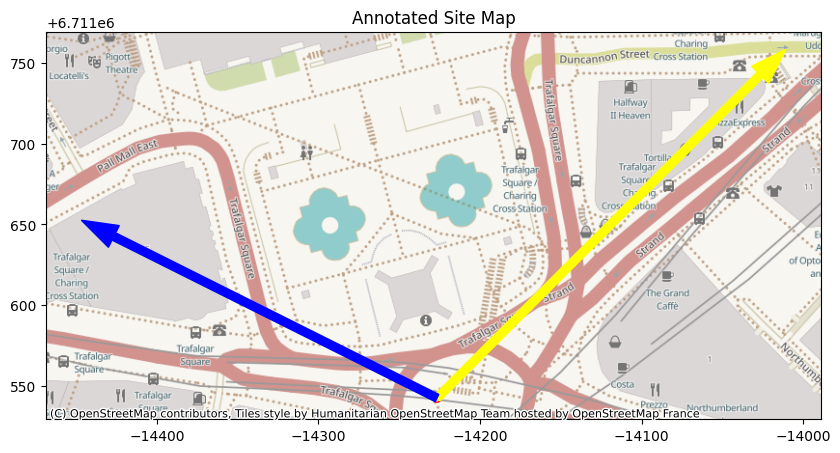

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
boundary.plot(ax=ax, facecolor="none", edgecolor="red")

# Sun vector example
plt.arrow(boundary.centroid.x.iloc[0], boundary.centroid.y.iloc[0], 200, 200, color="yellow", width=5)

# Wind arrow example
plt.arrow(boundary.centroid.x.iloc[0], boundary.centroid.y.iloc[0], -200, 100, color="blue", width=5)

ctx.add_basemap(ax)
plt.title("Annotated Site Map")
plt.show()

In [ ]:
import rasterio
# Placeholder for DEM retrieval

In [ ]:
# Placeholder slope calculation

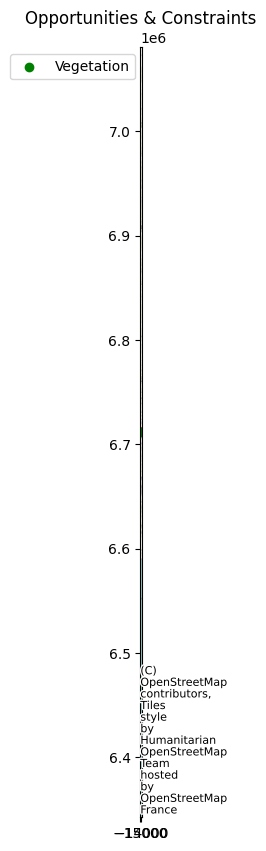

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
boundary.plot(ax=ax, facecolor="none", edgecolor="red")

# Add layers: noise, vegetation, access, etc.
# Example placeholder
plt.scatter(boundary.centroid.x, boundary.centroid.y, color="green", label="Vegetation")

ctx.add_basemap(ax)
plt.legend()
plt.title("Opportunities & Constraints")
plt.show()

In [ ]:
from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import A4
import matplotlib.pyplot as plt

# Save the base map as an image file
fig_basemap, ax_basemap = plt.subplots(figsize=(10,10))
boundary.plot(ax=ax_basemap, facecolor="none", edgecolor="red", linewidth=2)
ctx.add_basemap(ax_basemap, source=ctx.providers.OpenStreetMap.Mapnik)
ax_basemap.set_title("Site Boundary — Base Map")
plt.savefig("base_map.png", bbox_inches='tight', dpi=300)
plt.close(fig_basemap) # Close the figure to avoid displaying it twice

c = canvas.Canvas("Site_Analysis_Report.pdf", pagesize=A4)
c.setFont("Helvetica-Bold", 18)
c.drawString(50, 800, f"Site Analysis Report — {project_name}")

c.setFont("Helvetica", 12)
c.drawString(50, 780, f"Client: {client_name}")
c.drawString(50, 765, f"Date: {report_date}")

# Add images
c.drawImage("base_map.png", 50, 500, width=500, height=250)

c.showPage()
c.save()

In [ ]:
from google.colab import files
files.download("Site_Analysis_Report.pdf")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>